In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

In [56]:
#Read NN and BMS data
n=0;function='leaky_ReLU' #tanh, leaky_ReLU
NPAR=20 #10, 20

#Read NN data
train_size=60
file_model='NN_model_' + function + '_train_' +str(train_size)+ '_NREP_10_data' + '.csv'
model_d='../data/' + file_model
d=pd.read_csv(model_d)
dn=d[d['rep']==n]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)

#Read BMS data
filename='local_' +'BMS_' + function + '_trace.' + str(n) + '_prior_'  + str(NPAR) + '.csv'
if NPAR==10:
    filename='local_' + 'BMS_' + function + '_trace.' + str(n) + '_prior_'  + str(NPAR) + '.csv'
print(filename)    
trace=pd.read_csv('../data/MSTraces/' + filename, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])

local_BMS_leaky_ReLU_trace.0_prior_20.csv


In [57]:
#Minimum description length
minrow = trace[trace.H == max(trace.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)

print(minH)
print(minexpr)
print(minparvals)

125.07057662887362
(((_a17_ / pow2(((((pow2(_a1_) * ((_a18_ + _a8_) / _a12_)) * (_a4_ * (_a2_ / (_a17_ * _a11_)))) ** (_a6_ * exp(_a6_))) * ((_a14_ / _a16_) * _a11_)))) * (((_a13_ / _a7_) + _a5_) + _a17_)) ** _a11_)
{'d0': {'_a0_': 1.0, '_a1_': 1.0, '_a2_': 1.0, '_a3_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0, '_a8_': 1.0, '_a9_': 1.0, '_a10_': 1.0, '_a11_': 1.0, '_a12_': 1.0, '_a13_': 1.0, '_a14_': 1.0, '_a15_': 1.0, '_a16_': 1.0, '_a17_': 1.0, '_a18_': 1.0, '_a19_': 1.0}}


In [58]:
VARS = ['x1',]
x = dn[[c for c in VARS]].copy()
y = dn.y


if NPAR==10:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')
elif NPAR==20:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np20.maxs200.2024-05-10 162907.551306.dat')

t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(NPAR)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,
)

t.set_par_values(deepcopy(minparvals))

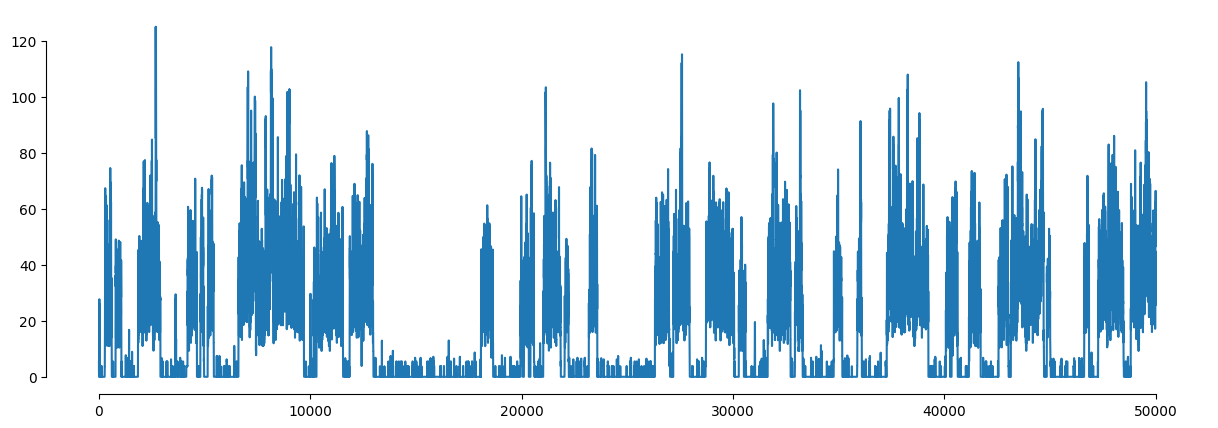

In [59]:
Nini = 00
plt.figure(figsize=(15, 5))

#Define figure size in cm                                                                           
Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                           

plt.plot(trace.t[trace.t > Nini], trace.H[trace.t > Nini])
sns.despine(trim=True)

Name_figure='MDL_' + function + '_' + str(n) + '_par_' + str(NPAR)
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

 
plt.show()

      x1         y  rep    ymodel      ybms
0  -1.95  0.052185  0.0  0.052760  0.636761
1  -1.90  0.056609  0.0  0.056912  0.636761
2  -1.85  0.061686  0.0  0.061764  0.636761
3  -1.80  0.067569  0.0  0.067469  0.636761
4  -1.75  0.074452  0.0  0.074224  0.636761
..   ...       ...  ...       ...       ...
75  1.80  0.997513  0.0  0.989075  0.636761
76  1.85  0.997161  0.0  0.989179  0.636761
77  1.90  0.996811  0.0  0.989273  0.636761
78  1.95  0.996446  0.0  0.989358  0.636761
79  2.00  0.996045  0.0  0.989435  0.636761

[80 rows x 5 columns]


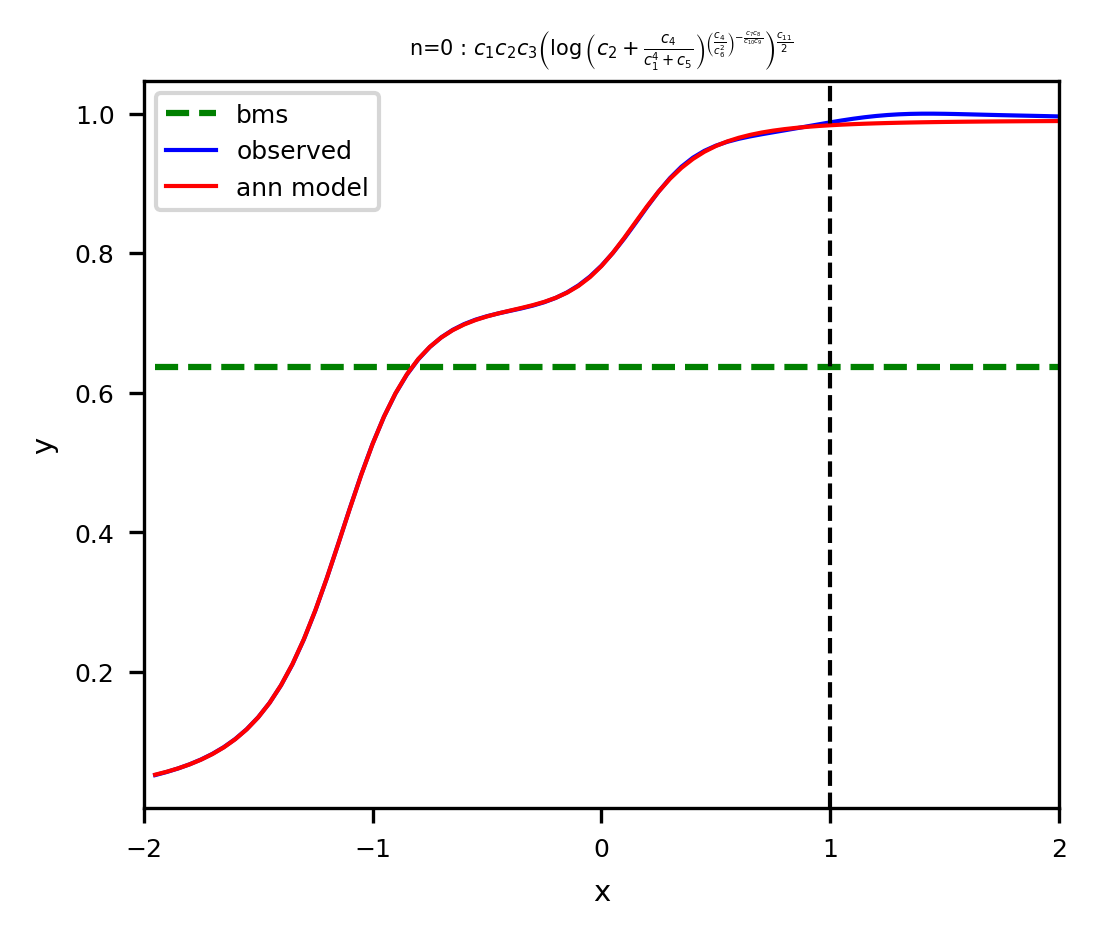

In [52]:
#Plot
train_border=dn.loc[train_size-1]['x1']

dplot = deepcopy(dn)
dplot['ybms'] = t.predict(x)
print(dplot)

#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 10*cm; height=8*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          


fig=figure(figsize=(width,height), dpi=300)                                                        

plt.plot(dplot.x1, dplot.ybms, color='green', linestyle='--',label='bms')
plt.plot(dn['x1'], dn['y'],linewidth=line_w, color='blue',label='observed')                                                      
plt.plot(dn['x1'], dn['ymodel'],linewidth=line_w, color='red', label='ann model')   

plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

#plt.title('$%s$' % t.latex(),fontsize=size_title)
plt.title('n=%d : $%s$' % (n, t.latex()),fontsize=size_title)
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', fontsize=size_ticks)

plt.xlim(-2,2);#plt.ylim(-0.1,1.1)                                               

Name_figure='Test_' + function + '_' + str(n) + '_par_' + str(NPAR)
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

plt.show()